# Single Enhancement

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from scipy import ndimage, misc
from skimage import exposure
from scipy.ndimage import gaussian_filter

In [25]:
img = io.imread('./image-test/17.png')

(-0.5, 511.5, 511.5, -0.5)

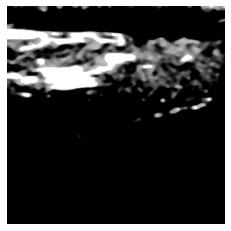

In [31]:
imgg = img
imgg = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
img_gauss = gaussian_filter(imgg, sigma = 2)
rescale = exposure.rescale_intensity(img_gauss, in_range=(10,50))
img_histeq = exposure.equalize_hist(rescale)
img_median = ndimage.median_filter(img_histeq, size=10)
saveimage = cv2.normalize(src=img_median,dst=None,alpha=0, beta=255,norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_8U)
#ret, thresh = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)

plt.imshow(saveimage, cmap = 'gray')
plt.axis('off')

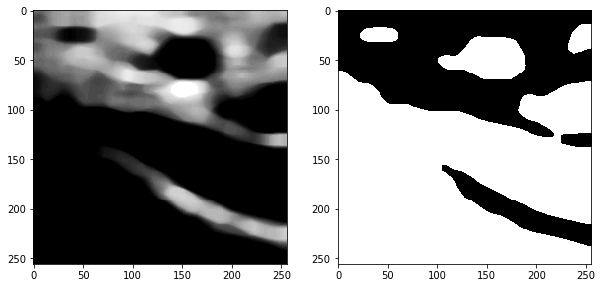

In [5]:
img = io.imread('./image-test/FLT80.png')
ret, thresh = cv2.threshold(img, 55, 255, cv2.THRESH_BINARY_INV)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))
ax1.imshow(img, cmap = 'gray')
ax2.imshow(thresh, cmap = 'gray')

In [37]:
img = io.imread('./image-test/26.png')
img1 = io.imread('./image-test/26_.png')

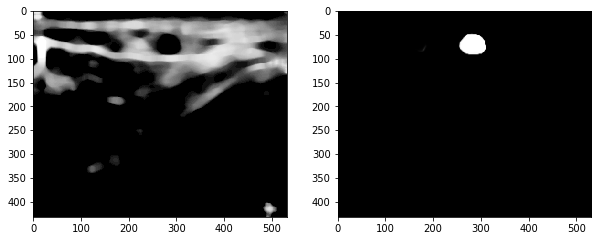

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))
ax1.imshow(img, cmap = 'gray')
ax2.imshow(img1, cmap = 'gray')

In [87]:
red = np.array([255, 0, 0])
green = np.array([0, 255, 0])
blue = np.array([0, 0, 255])
yellow = np.array([255, 255, 0])
aqua = np.array([0, 255, 255])

def masking(img, mask, color = None):
    mask_out = np.zeros((432, 532, 3), dtype = 'uint8')
    for i in range(mask.shape[0]-1):
        for j in range(mask.shape[1]-1):
            if (mask[i,j] >= 240):
                mask_out[i,j,:] = mask[i,j] 
                mask_out[i,j,:] = color
    segmented = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) + mask_out
    return segmented

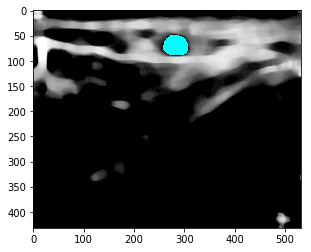

In [90]:
plt.imshow(masking(img, img1, color = aqua))

In [98]:
segmented.shape

(432, 532, 3)

# CONTOUR

In [1]:
import cv2
import numpy as np


QR_orig = cv2.imread('./FinalProjectNotebookList/image-test/result-test.png', 0)
QR = cv2.imread('./FinalProjectNotebookList/image-test/GTtest.png', 0) # read the QR code binary image as grayscale image to make sure only one layer
mask = np.zeros(QR.shape,np.uint8) # mask image the final image without small pieces

# using findContours func to find the none-zero pieces
contours, hierarchy = cv2.findContours(QR,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# draw the white paper and eliminate the small pieces (less than 1000000 px). This px count is the same as the QR code dectection
for cnt in contours:
    if cv2.contourArea(cnt)>1000000:
        cv2.drawContours(mask,[cnt],0,255,-1) # the [] around cnt and 3rd argument 0 mean only the particular contour is drawn

        # Build a ROI to crop the QR
        x,y,w,h = cv2.boundingRect(cnt)
        roi=mask[y:y+h,x:x+w]
        # crop the original QR based on the ROI
        QR_crop = QR_orig[y:y+h,x:x+w]
        # use cropped mask image (roi) to get rid of all small pieces
        QR_final = QR_crop * (roi/255)

cv2.imwrite('QR_final.TIF', QR_final)

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
Qr